In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
raw_data = pd.read_csv("train.csv",index_col=0)

In [3]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_data.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [5]:
df = raw_data.copy()
df = raw_data.reset_index()

In [6]:
df = df.drop(["Cabin","Name","Ticket","PassengerId"],axis=1)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
gender = {1:"male",2:"female"}

In [9]:
df_plot = df.copy()

In [10]:
def plot_hist(column):
    plt.hist(df_plot[column].to_list())

In [187]:
interact(plot_hist,column=df_plot.columns.to_list())

interactive(children=(Dropdown(description='column', options=('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Pa…

<function __main__.plot_hist(column)>

In [12]:
quantile_list = [0, .25, .5, .75, 1.]
def adaptive_quantile(column):
    print(df[column].quantile(quantile_list))

In [13]:
interact(adaptive_quantile,column=['Age','Fare'])

interactive(children=(Dropdown(description='column', options=('Age', 'Fare'), value='Age'), Output()), _dom_cl…

<function __main__.adaptive_quantile(column)>

In [14]:
imp = SimpleImputer()
df['Age'] = imp.fit_transform(df[['Age']])

In [15]:
df['Age_Range'] = pd.qcut(df['Age'],quantile_list)
df['Fare_Range'] = pd.qcut(df['Fare'],quantile_list)

In [16]:
pd.unique(df['Fare_Range'])

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [17]:
station = {'C':'Cherbourg','Q':' Queenstown','S':'Southampton'}
df['Embarked'] = df['Embarked'].map(station)

In [18]:
df = pd.get_dummies(df,columns=['Pclass'],prefix="Ticket_Class")

In [19]:
df = pd.get_dummies(df,columns=['Sex'],prefix="",prefix_sep="")

In [20]:
df = pd.get_dummies(df,columns=['Embarked'],prefix="from")

In [21]:
df = pd.get_dummies(df,columns=['Survived'])

In [22]:
df.head()

,Age,SibSp,Parch,Fare,Age_Range,Fare_Range,Ticket_Class_1,Ticket_Class_2,Ticket_Class_3,female,male,from_ Queenstown,from_Cherbourg,from_Southampton,Survived_0,Survived_1
0,22.0,1,0,7.2500,"(0.419, 22.0]","(-0.001, 7.91]",0,0,1,0,1,0,0,1,1,0
1,38.0,1,0,71.2833,"(35.0, 80.0]","(31.0, 512.329]",1,0,0,1,0,0,1,0,0,1
2,26.0,0,0,7.9250,"(22.0, 29.699]","(7.91, 14.454]",0,0,1,1,0,0,0,1,0,1
3,35.0,1,0,53.1000,"(29.699, 35.0]","(31.0, 512.329]",1,0,0,1,0,0,0,1,0,1
4,35.0,0,0,8.0500,"(29.699, 35.0]","(7.91, 14.454]",0,0,1,0,1,0,0,1,1,0


In [23]:
df['Family_Size'] = df['SibSp']+df['Parch']

In [24]:
df.head()

,Age,SibSp,Parch,Fare,Age_Range,Fare_Range,Ticket_Class_1,Ticket_Class_2,Ticket_Class_3,female,male,from_ Queenstown,from_Cherbourg,from_Southampton,Survived_0,Survived_1,Family_Size
0,22.0,1,0,7.2500,"(0.419, 22.0]","(-0.001, 7.91]",0,0,1,0,1,0,0,1,1,0,1
1,38.0,1,0,71.2833,"(35.0, 80.0]","(31.0, 512.329]",1,0,0,1,0,0,1,0,0,1,1
2,26.0,0,0,7.9250,"(22.0, 29.699]","(7.91, 14.454]",0,0,1,1,0,0,0,1,0,1,0
3,35.0,1,0,53.1000,"(29.699, 35.0]","(31.0, 512.329]",1,0,0,1,0,0,0,1,0,1,1
4,35.0,0,0,8.0500,"(29.699, 35.0]","(7.91, 14.454]",0,0,1,0,1,0,0,1,1,0,0


In [25]:
agewise = df.groupby(by=["Age_Range"]).sum().drop(['Age'],axis=1)

In [26]:
farewise = df.groupby(by="Fare_Range").sum().drop(['Age'],axis=1)

In [27]:
agewise['Fatality_Rate_%'] = agewise['Survived_0']/(agewise['Survived_0']+agewise['Survived_1'])
farewise['Fatality_Rate_%'] = farewise['Survived_0']/(farewise['Survived_0']+farewise['Survived_1'])

In [188]:
def plot_agewise_pie(column):
    plt.figure(figsize=(6,6))
    plt.pie(agewise[column],labels=agewise.index.to_list(),autopct='%.2f',shadow=True)
    plt.title("Age_Range v/s {} (%)".format(column))
interact(plot_agewise_pie,column=agewise.columns.to_list())

interactive(children=(Dropdown(description='column', options=('SibSp', 'Parch', 'Fare', 'Ticket_Class_1', 'Tic…

<function __main__.plot_agewise_pie(column)>

In [29]:
def plot_farewise_pie(column):
    plt.figure(figsize=(6,6))
    plt.pie(farewise[column],labels=farewise.index.to_list(),autopct='%.2f',shadow=True)
    plt.title("Fare Range v/s {}".format(column))
interact(plot_farewise_pie,column=farewise.columns.to_list())

interactive(children=(Dropdown(description='column', options=('SibSp', 'Parch', 'Fare', 'Ticket_Class_1', 'Tic…

<function __main__.plot_farewise_pie(column)>

In [30]:
farewise.head()

,SibSp,Parch,Fare,Ticket_Class_1,Ticket_Class_2,Ticket_Class_3,female,male,from_ Queenstown,from_Cherbourg,from_Southampton,Survived_0,Survived_1,Family_Size,Fatality_Rate_%
Fare_Range,,,,,,,,,,,,,,,
"(-0.001, 7.91]",12,5,1568.6203,6,6,211,43,180,51,34,138,179,44,17,0.802691
"(7.91, 14.454]",33,22,2326.4752,0,86,138,67,157,6,18,200,156,68,55,0.696429
"(14.454, 31.0]",167,136,5112.3662,51,70,101,93,129,18,42,162,121,101,303,0.545045
"(31.0, 512.329]",254,177,19686.4876,159,22,41,111,111,2,74,144,93,129,431,0.418919


In [44]:
df_tickets = df[df.columns[6:]]

In [55]:
raw_data = raw_data.drop(['index','PassengerId'],axis=1)

In [57]:
ticket_data = raw_data[["Survived","Pclass","Sex"]]

In [88]:
gender_class_survival = ticket_data.groupby(["Pclass","Sex"]).aggregate(['sum','count'])

In [101]:
gender_class_survival = gender_class_survival.rename(columns={'sum':'Passengers_Survived','count':'Total_Passengers'})

In [112]:
gender_class_survival['Survival_Rate_%'] = gender_class_survival[('Survived', 'Passengers_Survived')]/gender_class_survival[('Survived',    'Total_Passengers')]*100

In [128]:
gender_class_survival.sort_values('Survival_Rate_%')

Survived                  Survival_Rate  \
              Passengers_Survived Total_Passengers                 
Pclass Sex                                                         
3      male                    47              347      0.135447   
2      male                    17              108      0.157407   
1      male                    45              122      0.368852   
3      female                  72              144      0.500000   
2      female                  70               76      0.921053   
1      female                  91               94      0.968085   

              Survival_Rate_%  
                               
Pclass Sex                     
3      male         13.544669  
2      male         15.740741  
1      male         36.885246  
3      female       50.000000  
2      female       92.105263  
1      female       96.808511

Text(0.5, 1.0, 'Survival Rate (Ticket Class, Gender)')

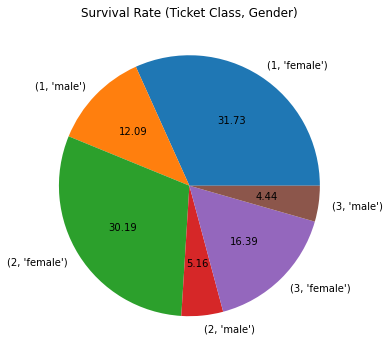

In [137]:
plt.figure(figsize=(6,6))
plt.pie(gender_class_survival[('Survival_Rate_%')],labels=gender_class_survival.index,autopct='%.2f')
plt.title("Survival Rate (Ticket Class, Gender)")

In [173]:
city_data = raw_data[['Survived','Embarked']]
city_data = city_data.dropna()

In [174]:
city_data['Embarked'] = city_data['Embarked'].map(station)

In [175]:
city_survival = city_data.groupby(by=["Embarked"]).aggregate(['sum','count']).rename(columns={'sum':'Total_Survived','count':'Total_Boarded'})
city_survival

Survived              
            Total_Survived Total_Boarded
Embarked                                
 Queenstown             30            77
Cherbourg               93           168
Southampton            217           644

In [177]:
city_survival['Survival_Rate'] = city_survival[('Survived', 'Total_Survived')]/city_survival[('Survived',  'Total_Boarded')]*100
city_survival

Survived               Survival_Rate
            Total_Survived Total_Boarded              
Embarked                                              
 Queenstown             30            77     38.961039
Cherbourg               93           168     55.357143
Southampton            217           644     33.695652

Text(0.5, 1.0, 'City & Survival Rate(%)')

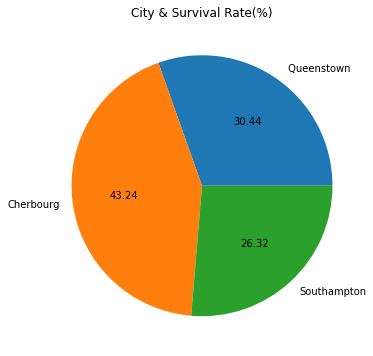

In [186]:
plt.figure(figsize=(6,6))
plt.pie(city_survival["Survival_Rate"],labels=city_survival.index,autopct='%.2f')
plt.title("City & Survival Rate(%)")

In [237]:
def plot_boxplot(column):
    plt.figure(figsize=(3,8))
    plt.title("Box Plot for {} Distribution (Outlier Detection)".format(column))
    sb.boxplot(data=raw_data,x=column,orient='v',width=0.6)

In [238]:
interact(plot_boxplot,column=['Age','Fare'])

interactive(children=(Dropdown(description='column', options=('Age', 'Fare'), value='Age'), Output()), _dom_cl…

<function __main__.plot_boxplot(column)>

Text(0.5, 1.0, 'Age v/s Fare')

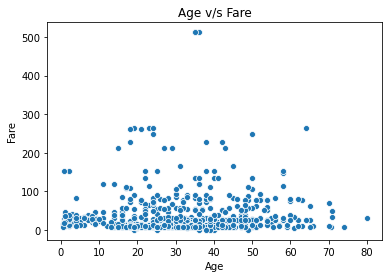

In [241]:
sb.scatterplot(x=raw_data['Age'],y=raw_data['Fare'])
plt.title("Age v/s Fare")